# Part 2 - Parallel Scraping with LXML and Requests

By "Emma Fountain"

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fd1pnnwteuly8z3.cloudfront.net%2Fimages%2F4d5bf260-c3d0-4f21-b718-8ede8d4ca716%2Ffebf9de6-8a5a-4055-b274-e685485496f5.jpeg&f=1&nofb=1&ipt=bf80bfde91f23c2d4b5f92e6b36e2f9d8d45986dfc12b5b01cb61455a71f6bab" alt="Webscraping image" width="80%">

---
# Abstract

&#9989;  Provide a short paragraph about the software and scientific/engineering domain you cover in your project (research area, sports, economics, etc). Explain why you picked this domain (i.e. what is your motivation). Explain how computation is used in this domain. Give a short description of what you did and a summary of results.

I am using lxml and requests to do web scraping, a data science technique where you collect data from a website and put it into a more easily accessible structured format. I picked this project as I am interested in data science, familiar with basic web-scraping techniques, and have commonly run into the issue of long-running web-scraping jobs. Computation is central to web-scraping at all levels, from making HTTP requests to collecting and storing data. I wrote a basic web-scraper using the lxml and requests python libraries to scrape data on votes for various Michigan State lawmakers and store that data as a json file.

---
# Methodology

&#9989;  Provide a more detailed description about what you did for this project.  Include detailed instructions needed to reprodue the project.  These instructions should be detailed enough for a future student to be able to read the report, reproduce your results and pick up where you left off.

This project relies on HPCC. To begin, clone the repo and navigate into the appropriate folder.

### Anaconda

To install the anaconda environment please run the below commands

```bash
module purge
module load Miniforge3
conda env create -p ./env -f environment.yml
```

To activate this environment for testing or developing run `conda activate ./env`.

### Approach

This project is primarily based around the `PScraping.py` file which adds utilities for scraping numerous pages in parallel. In particular, it adds a function `parallelPage` which simplifies scraping when the site uses pagination. To use it, you must pass a function `scrapeFn` that takes as its argument a single html string and returns whatever data you wish to scrape from that page. For an example of what `scrapeFn` might look like, please see the `getVotes` function in `MichiganVotes.py`. In addition it requires a `pageExistsFn` which takes an html string and returns true if the page is valid input for `scrapeFn` and false otherwise. An example of this `pageExistsFn` can be found in `MichiganVotes.py` as well.

In addition, you may specify a list of proxies to use to avoid rate limits. The function `getProxies` returns a list of all valid US http proxies from [Proxifly](https://github.com/proxifly/free-proxy-list), but any list of proxies in the form `<protocol>://<ip>:<port>` will work.

### Experiments

To test the code, there are 2 sbatch files, `parallel.sb` and `serial.sb`. They each run essentially the same code, selecting the first 5 lawmakers, scraping their data, and saving it to the local `legislators.json` file, but `parallel.sb` runs in parallel using `parallelPage` while `serial.sb` does not.

I ran each batch file 10 times and read the timing information in the output to generate the graphs below.

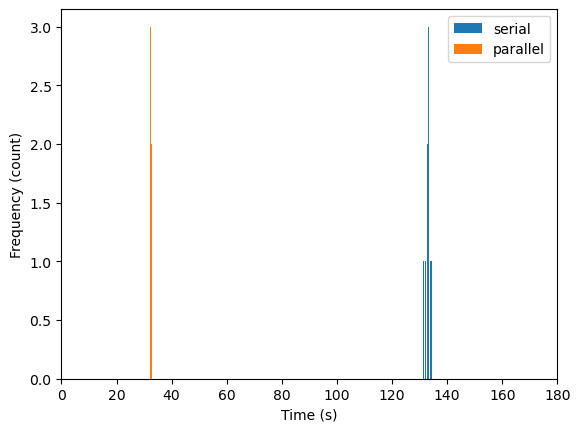

In [9]:
## NOTE: This is the code I used to generate the timing study figure.
# It will not run unless you have matlplotlib installed, but it is not necessary to run.
# The resultant image is included and embedded below
import matplotlib.pyplot as plt

serial = [
    2*60 + 14.049, 2*60 + 13.191, 2*60 + 12.036, 2*60 + 13.194, 2*60 + 14.382,
    2*60 + 12.852, 2*60 + 12.802, 2*60 + 11.303, 2*60 + 13.258, 2*60 + 12.851
]
parallel = [
    32.696, 32.146, 32.177, 32.682, 32.852, 32.369, 31.759, 32.173, 32.379, 32.334
]
plt.hist(serial, label="serial")
plt.hist(parallel, label="parallel")
plt.legend()
plt.xlim((0, 180))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (count)")
plt.savefig("TimingStudy.png")

---
# Timing Results

I ran all trials on the MSU HPCC using the SLURM scheduler using an Intel(R) Xeon(R) CPU E5-2680 v4 (2.40 GHz) cpu as described [here](https://docs.icer.msu.edu/Cluster_Resources/) with 16GB of memory. For the parallel program I assigned it 16 cpus. As shown in the histogram below, the parallel approach (around 30 seconds) significantly outperferformed the serial approach (around 130 seconds). The results were fairly tightly clustered, with some slight spread for the serial runs. This is a very positive result as it shows that parallelizing paging using this approach can lead to signficant speedups.

<img src="./TimingStudy.png" alt="Timing study histogram, with parallel runs clustered around 30 seconds and serial clustered around 135 seconds" width="80%">

---
# Concluding Discussion and Future Work

This project demonstrated that parallel computing can significantly speed up python webscraping. By using lxml and requests to define a simple scraping function that works for a single page, then applying that with the python multiprocessing library to scrape multiple pages simultaneously, we can easily speed up the scraping process. An interesting next step might be to identify additional bottlenecks in the standard scraping process that could benefit from parallelization and writing additional utilities to speed them up.

---
# References

- [Proxifly](https://github.com/proxifly/free-proxy-list?tab=readme-ov-file) - list of free proxies
- [MichiganVotes](https://www.michiganvotes.org/) - scraping target for example code

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----